In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

Matplotlib is building the font cache; this may take a moment.


In [12]:
# SKLEARN CLASSES & LIBRARIES

# importing train test split & GridSearchCV (for performing grid search on various model parmeters)
from sklearn.model_selection import train_test_split, GridSearchCV

# import StandarScaler for data Standardization
from sklearn.preprocessing import StandardScaler

# importing linear regression, polynomial regression, Regulariation classes (Ridge, Lasso, ElasticNet)
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error

# importing model evaluation metrics
from sklearn.metrics import __all__

In [13]:
df = pd.read_csv("dataset_flooding_elevation.csv")

df.head()

,elevation (m),rainfall (mm),mean temp
0,5.00,3362.9,27.0
1,10.60,1816.1,27.7
2,3.00,1892.7,27.3
3,1510.08,3824.0,19.5
4,173.00,3357.0,26.7


In [14]:
df.describe()

,elevation (m),rainfall (mm),mean temp
count,53.000000,53.000000,53.000000
mean,92.055323,2622.905660,27.298113
std,238.492579,845.438645,1.514861
min,2.000000,958.100000,19.500000
25%,5.000000,2119.300000,27.300000
50%,15.487000,2415.000000,27.700000
75%,60.000000,3243.500000,28.100000
max,1510.080000,4761.600000,28.900000


In [15]:
df.isnull().sum()

elevation (m)    0
rainfall (mm)    0
mean temp        0
dtype: int64

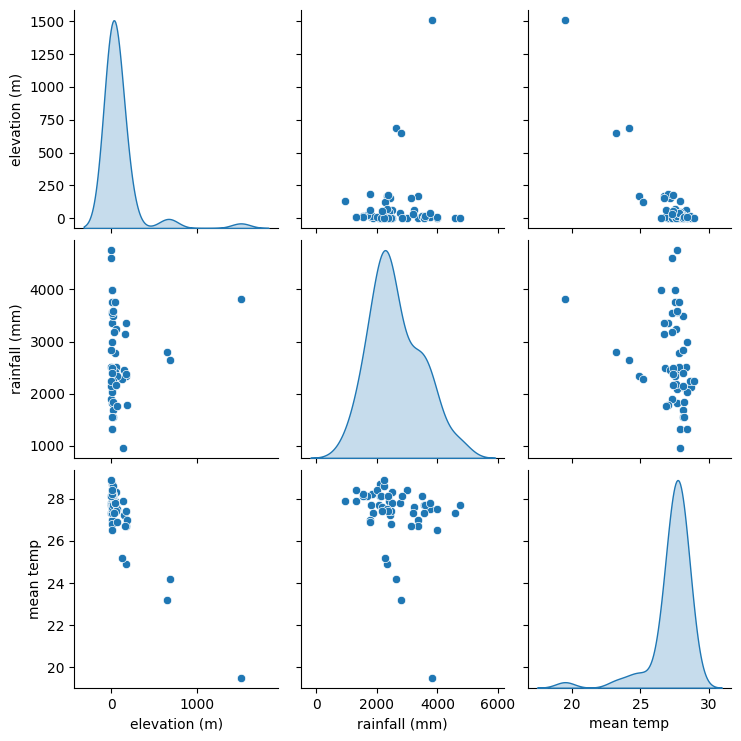

In [16]:
sns.pairplot(df, diag_kind='kde')

               elevation (m)  rainfall (mm)  mean temp
elevation (m)       1.000000       0.147676  -0.909123
rainfall (mm)       0.147676       1.000000  -0.254312
mean temp          -0.909123      -0.254312   1.000000


<Axes: >

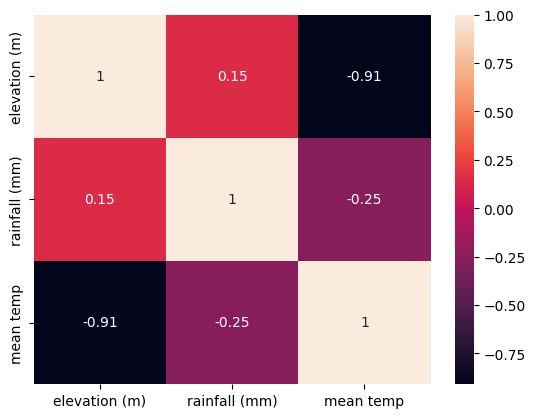

In [17]:
print(df.corr())
sns.heatmap(df.corr(),annot=True)

In [18]:
X = df['elevation (m)'].to_numpy().reshape(-1,1)
y = df['mean temp']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [21]:
pred = lin_reg.predict(X_test)

In [22]:
mse = np.sqrt(mean_squared_error(y_test, pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 0.665 (2.41%)


In [23]:
score = lin_reg.score(X_train, y_train)
# coefficient of determination
print('Model determination: ', score)

Model determination:  0.8581308860712524


Mean error: 0.651 (2.36%)
Model determination:  0.8624378331140765


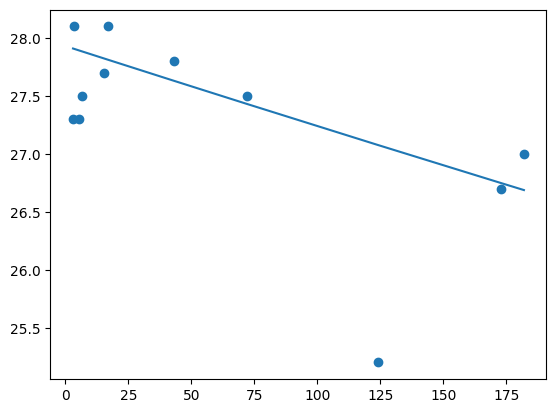

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test, pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')
score = pipeline.score(X_train, y_train)
# coefficient of determination
print('Model determination: ', score)

plt.pyplot.scatter(X_test, y_test)
plt.pyplot.plot(sorted(X_test), pipeline.predict(sorted(X_test)))